In [1]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------

# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, MaxAbsScaler

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn import set_config
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

In [2]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# regular expressions:
import re
# -------------------------------------

In [3]:

train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [4]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [5]:
df_test.head(8)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני..."
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...
5,5,בפעם האחרונה שהייתי מחוץ לארץ ישראל הייתי באפר...
6,6,בשנת 2018 קיבלתי החלטה שאני מתחיל ללמוד לתואר ...
7,7,"בנובמבר האחרון הייתי עם חברים בטיול ים אל ים, ..."


(323, 2)

# Preparing the data for a supervised learning


---




In [56]:
X_train = df_train["story"]
y_train = df_train["gender"].replace({'m': 1, 'f': 0})

# A raw code with 1 model and no Hyperparameters, just for testing

---



In [60]:
pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(min_df=5)),
        ('norm', preprocessing.Normalizer(norm='l1')),
        ('model', Perceptron())
    ])
 
cross_val = cross_val_score(pipeline, X_train, y_train, scoring=make_scorer(f1_score, average='macro'), cv=10).mean()
print(cross_val)

0.5856652611283314


# Creating models list

*I'll use this list to perform grid search later on and evaluate these classifiers.*

---



In [15]:
models = [
    ('Perceptron', Perceptron()),
    ('LinearSVC', LinearSVC()),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('MultinomialNB', MultinomialNB()),
    ('SGDClassifier', SGDClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier())
]

# Making `set_parameters` function:

Sets the grid search parameters for each classifier based on its name. For now, it will just take some Hyperparameters for the models.

---




In [16]:
def set_parameters():
    if name == 'LinearSVC':
        parameters = {'model__C': [0.1, 1, 10], 'model__penalty': ['l1', 'l2']}
    elif name == 'Perceptron':
        parameters = {'model__alpha': [0.0001, 0.001, 0.01], 'model__penalty': ['l1', 'l2']}
    elif name == 'DecisionTreeClassifier':
        parameters = {'model__max_depth': [5, 10, 15], 'model__min_samples_leaf': [5, 10, 15]}
    elif name == 'MultinomialNB':
        parameters = {'model__alpha': [0.01, 0.1, 1]}
    elif name == 'SGDClassifier':
        parameters = {'model__alpha': [1e-3, 1e-4], 'model__penalty': ['l1', 'l2']}
    elif name == 'KNeighborsClassifier':
        parameters = {'model__n_neighbors': [3, 5, 7]}
    
    return parameters

In this part below, the code iterats over each model and creats a pipeline with the specified steps, sets the parameters for grid search using the `set_parameters()` function. Then it will perform grid search with cross-validation using `GridSearchCV` for each model, searching over the specified parameter grid. It will then print the best score, and the best estimator.

**best_estimator_**: 

*Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.*

**best_score_**:

Mean cross-validated score of the best_estimator

[sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

---




In [20]:
for name, model in models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer(norm='l1')),
        ('model', model)
    ])

    parameters = set_parameters()
     
    set_config(display='diagram')       # Please note that the GridSearch diagram in this code cell
                                        # may not be displayed correctly on GitHub. 
                                        # To view the diagrams I added screenshots after each reult.
                                        # Additionally, if you open it in Google Colab notebook, it could be displayed properly
                
                                          
    grid = GridSearchCV(pipeline, parameters, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    print("Best score is:", round(grid.best_score_, 3))
    print("Best estimator:", grid.best_estimator_)
    



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [0.0001, 0.001, 0.01],
                         'model__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.534
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model', Perceptron(penalty='l2'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.433
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model', LinearSVC(C=0.1))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [5, 10, 15]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.586
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model',
                 DecisionTreeClassifier(max_depth=15, min_samples_leaf=15))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.01, 0.1, 1]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.433
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model', MultinomialNB(alpha=0.01))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__penalty': ['l1', 'l2']},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.433
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model', SGDClassifier(alpha=0.001, penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer(norm='l1')),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.455
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer()), ('norm', Normalizer(norm='l1')),
                ('model', KNeighborsClassifier(n_neighbors=3))])


# Bellow is a visually enhanced representation of the results:

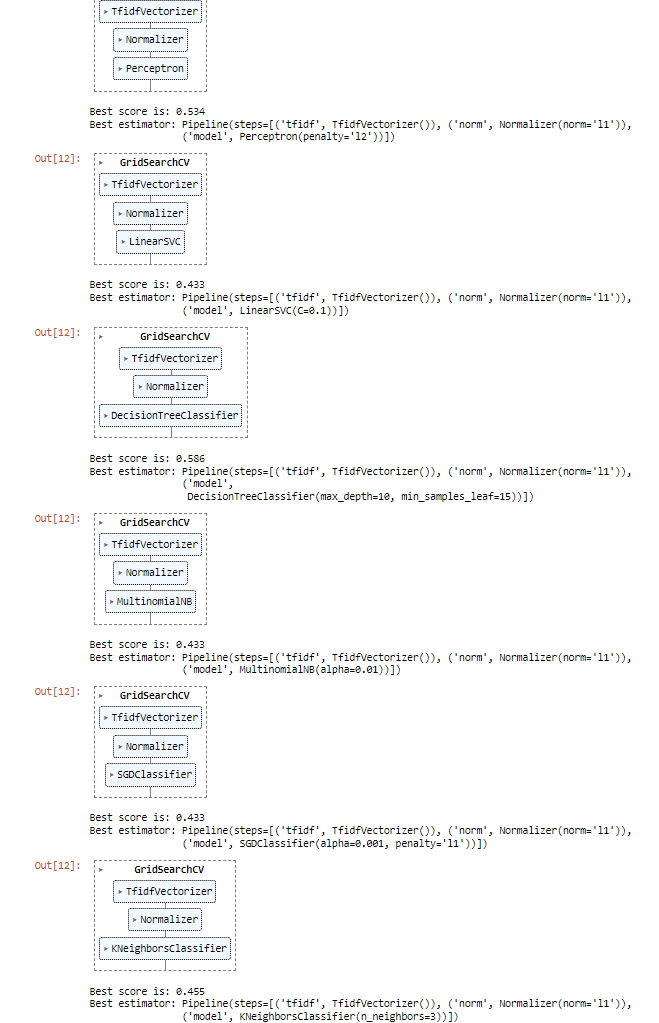

# Not good results at all!

I figured out I should also check some other parameters for the `TfidfVectorizer()` and the `preprocessing.Normalizer()`.

**So now I will try to change the `set_parameters()` function and the pipeline accordingly**

I will try multiple combinations.

---




In [21]:
def set_parameters():
    if name == 'LinearSVC':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'model__C': [0.1, 1, 10],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'Perceptron':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9],'tfidf__sublinear_tf':[True, False],
                    'model__alpha': [0.000001, 0.00001, 0.0001], 'model__penalty': ['l2', 'l1']}

  
    elif name == 'DecisionTreeClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__max_depth': [5, 10, 15],
                      'model__min_samples_leaf': [5, 10, 15]}

    
    elif name == 'MultinomialNB':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [0.01, 0.1, 1]}

   
    elif name == 'SGDClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5],
                      'tfidf__max_df': [0.8, 0.9], 'model__alpha': [1e-3, 1e-4],
                      'model__penalty': ['l1', 'l2']}

    elif name == 'KNeighborsClassifier':
        parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)], 'tfidf__min_df' : [2, 4, 5], 
                      'tfidf__max_df': [0.8, 0.9], 'model__n_neighbors': [3, 5, 7],
                      'model__metric': ['euclidean', 'manhattan', 'chebyshev'],
                      'model__leaf_size': [10, 20, 30]}

    return parameters


In [22]:
for name, model in models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer(norm = 'l2')),
        ('model', model)
    ])
  

    parameters = set_parameters()

    grid = GridSearchCV(pipeline, parameters, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)


    print("Best score is:", round(grid.best_score_, 3))
    print("Best estimator:", grid.best_estimator_)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [1e-06, 1e-05, 0.0001],
                         'model__penalty': ['l2', 'l1'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__sublinear_tf': [True, False]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.726
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=2, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model', Perceptron(alpha=1e-06, penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', LinearSVC())]),
             param_grid={'model__C': [0.1, 1, 10],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.687
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', LinearSVC(C=10))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [5, 10, 15],
                         'model__min_samples_leaf': [5, 10, 15],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.645
Best estimator: Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.9, min_df=4)),
                ('norm', Normalizer()),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=15))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'model__alpha': [0.01, 0.1, 1],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.526
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()), ('model', MultinomialNB(alpha=0.01))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.712
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.8, min_df=5, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model', SGDClassifier(penalty='l1'))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [10, 20, 30],
                         'model__metric': ['euclidean', 'manhattan',
                                           'chebyshev'],
                         'model__n_neighbors': [3, 5, 7],
                         'tfidf__max_df': [0.8, 0.9],
                         'tfidf__min_df': [2, 4, 5],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.613
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model',
                 KNeighborsClassifier(leaf_size=10, metric='euclidean'))])


# Bellow is a visually enhanced representation of the results:

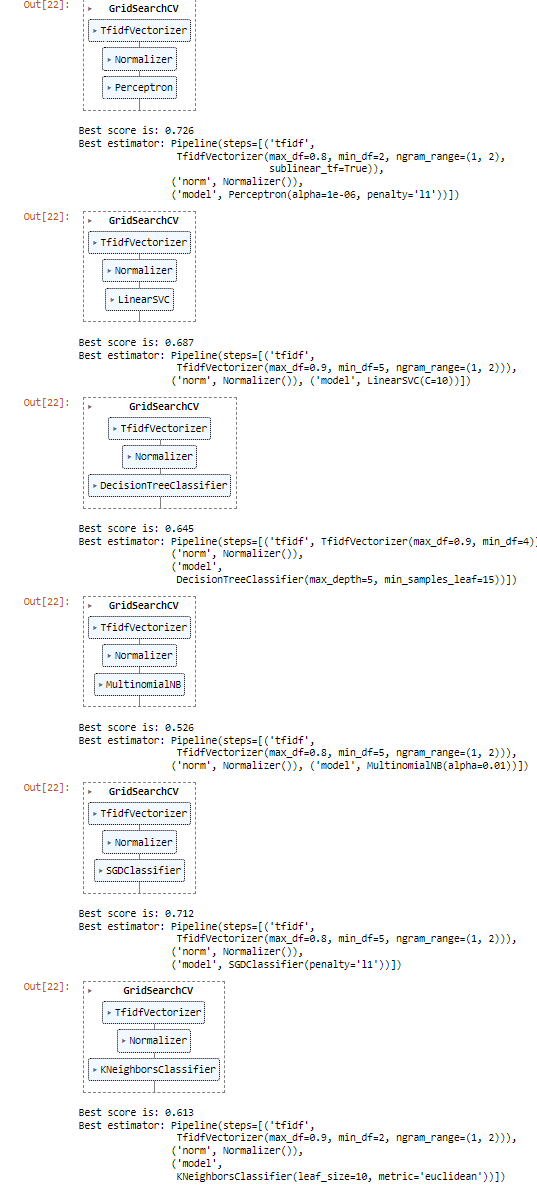

## Significant Improvements Achieved in all Models Performance!
After investing some time and effort, it is clear that the `SGDClassifier()` and `Perceptron()` models have shown the most promising results. These models outperformed the others and demonstrated superior performance.

Now that we have identified these two models as the top performers, we can focus our attention on further tuning them to try achieve even better results. 

---



In [23]:
chosen_models = [
    ('Perceptron', Perceptron()),
    ('SGDClassifier', SGDClassifier()),
]

In [24]:
def set_parameters_for_the_chosen_models():
    if name == 'Perceptron':
         parameters = {'tfidf__ngram_range': [(1, 2), (2, 2)],'tfidf__min_df': [2, 3, 6],
                       'tfidf__max_df': [0.8, 0.6, 0.7],'tfidf__sublinear_tf': [True, False],
                       'model__alpha': [0.000001, 0.001, 0.01], 'model__penalty': ['l2', 'l1'],
                       'model__fit_intercept': [True, False], 'model__shuffle': [True, False]}
    
    elif name == 'SGDClassifier':
         parameters = {'tfidf__ngram_range': [(1, 2), (2, 2)], 'tfidf__min_df': [4, 3, 6],
                       'tfidf__max_df': [0.8, 0.6, 0.7], 'model__alpha': [1e-3, 1e-4],
                       'model__penalty': ['l1', 'l2'], 'model__fit_intercept': [True, False], 
                       'model__loss': ['hinge', 'log', 'modified_huber']}

    return parameters


In [25]:
best_score_overall = 0.0
best_model_overall = None

for name, model in chosen_models:
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('norm', preprocessing.Normalizer(norm = 'l2')),
        ('model', model)
    ])
  

    parameters = set_parameters_for_the_chosen_models()

    grid = GridSearchCV(pipeline, parameters, scoring=make_scorer(f1_score, average='macro'), cv=10)
    grid.fit(X_train, y_train)

    if best_score_overall < grid.best_score_:
        best_score_overall = grid.best_score_
        best_model_overall = grid.best_estimator_

    print("Best score is:", round(grid.best_score_, 3))
    print("Best estimator:", grid.best_estimator_)


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', Perceptron())]),
             param_grid={'model__alpha': [1e-06, 0.001, 0.01],
                         'model__fit_intercept': [True, False],
                         'model__penalty': ['l2', 'l1'],
                         'model__shuffle': [True, False],
                         'tfidf__max_df': [0.8, 0.6, 0.7],
                         'tfidf__min_df': [2, 3, 6],
                         'tfidf__ngram_range': [(1, 2), (2, 2)],
                         'tfidf__sublinear_tf': [True, False]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.737
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('norm', Normalizer()),
                                       ('model', SGDClassifier())]),
             param_grid={'model__alpha': [0.001, 0.0001],
                         'model__fit_intercept': [True, False],
                         'model__loss': ['hinge', 'log', 'modified_huber'],
                         'model__penalty': ['l1', 'l2'],
                         'tfidf__max_df': [0.8, 0.6, 0.7],
                         'tfidf__min_df': [4, 3, 6],
                         'tfidf__ngram_range': [(1, 2), (2, 2)]},
             scoring=make_scorer(f1_score, average=macro))

Best score is: 0.713
Best estimator: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2))),
                ('norm', Normalizer()),
                ('model', SGDClassifier(fit_intercept=False, penalty='l1'))])


# Bellow is a visually enhanced representation of the results:

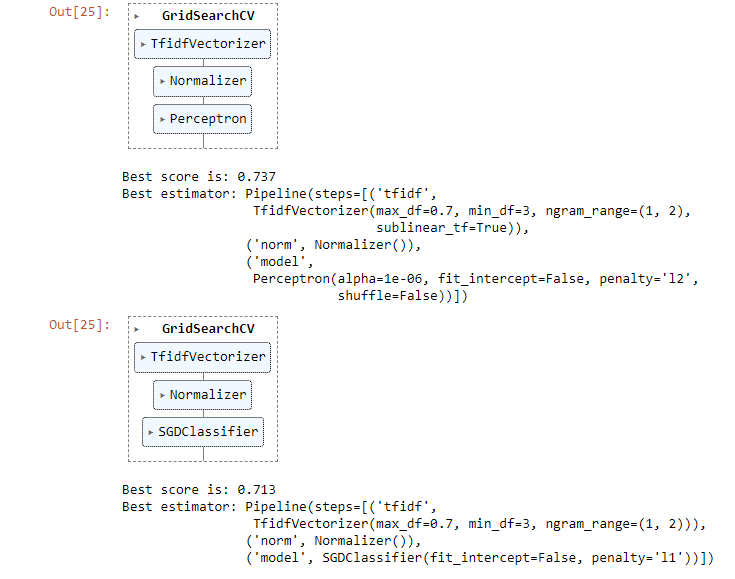

In [26]:
print(f"The best model overall is: {best_model_overall}\n")
print("The best score:", best_score_overall)

The best model overall is: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])

The best score: 0.7368324272547824


# I was able to further increase the performance of the Perceptron model.

now, I will proceed with utilizing the model that yielded the most favorable outcomes to make predictions for the initial 5 stories as well as the final 5 stories from the test dataframe. 

I will take the parameters which have shown the best results:

**The model and HP:** Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2', shuffle=False)

**Vectorizer:** Tfidf(max_df=0.7, min_df=3, ngram_range=(1, 2), sublinear_tf=True)

**Normalizer:** norm = 'l2' 

**Score:** 0.7368324272547824

---



# The final model:

The `Perceptron()` model will be chosen over the `SGDCclassifier()` model due to its perceived higher reliability and overall better results. The `SGDCclassifier()` model exhibits inconsistent scores across multiple runs, which poses a significant concern. In contrast, the `Perceptron()` model gives higher score and consistently maintains its performance throughout various iterations.

In [49]:
def test_df_prediction(chosen_model, model_score):
    X_test = df_test["story"]
    y_pred = chosen_model.predict(X_test)
    print(f"The score of the model and the certain parameters is: {model_score}\n")
    print(f"The model and all of the parameters are: {chosen_model}\n")

    # Combine the predicted labels with the stories in the test dataframe
    df_test['predicted_gender'] = y_pred
    
    # Replace 1 with "m" and 0 with "f" in the 'predicted_gender' column
    df_test['predicted_gender'] = df_test['predicted_gender'].replace({1: 'm', 0: 'f'})

    # Print the top 5 and bottom 5 stories
    print('Top 5 Stories:')
    display(df_test.head(5))
    print('\nBottom 5 Stories:')
    display(df_test.tail(5))



In [50]:
test_df_prediction(best_model_overall, best_score_overall)

The score of the model and the certain parameters is: 0.7368324272547824

The model and all of the parameters are: Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.7, min_df=3, ngram_range=(1, 2),
                                 sublinear_tf=True)),
                ('norm', Normalizer()),
                ('model',
                 Perceptron(alpha=1e-06, fit_intercept=False, penalty='l2',
                            shuffle=False))])

Top 5 Stories:


,test_example_id,story,predicted_gender
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,m



Bottom 5 Stories:


,test_example_id,story,predicted_gender
318,318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...",m
319,319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...",m
322,322,היום בו דיווחתי על גניבה של האוטו שלי. בוקר אח...,m
